In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Classificaiton with CNN

In [2]:
path = "/content/drive/MyDrive/AI and ML Level 6"

In [3]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image

# Data Preparation

## Visualize image per class:

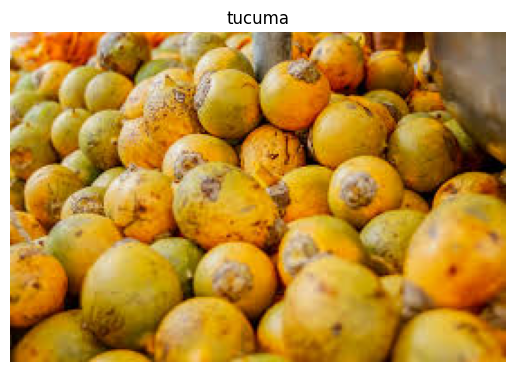

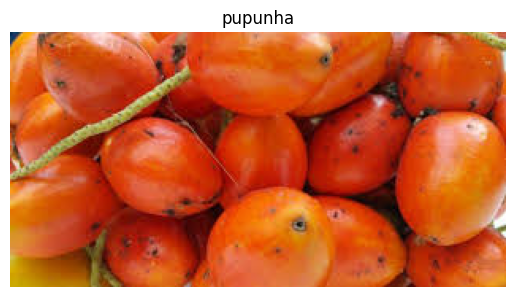

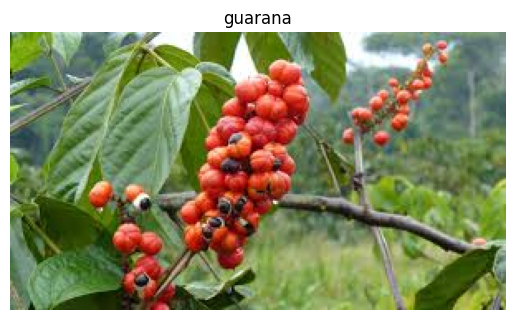

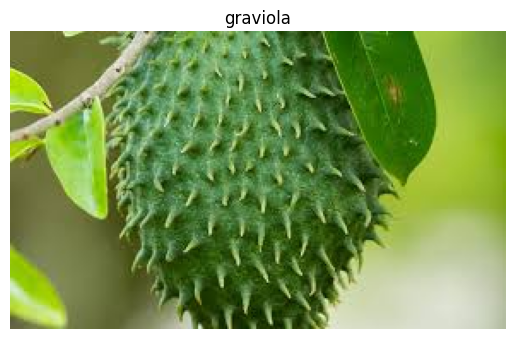

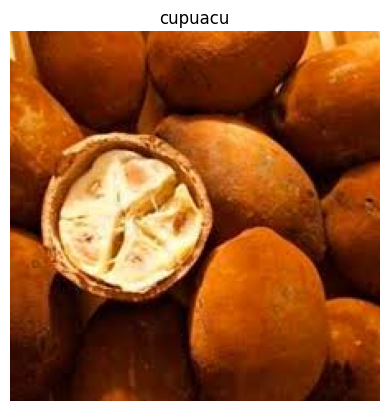

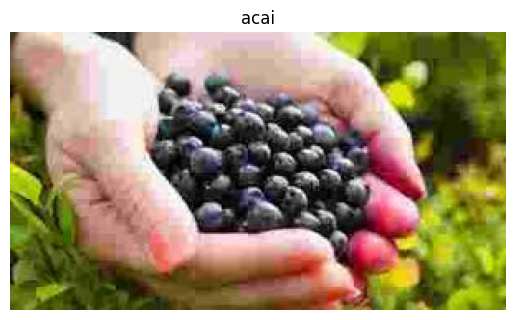

In [4]:

# Directory containing training images
train_dir = '/content/drive/MyDrive/AI and ML Level 6/train'

# Get list of subdirectories (each representing a class)
classes = os.listdir(train_dir)

# Display one image from each class
for class_name in classes:
    # Get list of image files in current class directory
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    # Load and display one image from current class
    if len(image_files) > 0:
        # Choose the first image from the class
        image_path = os.path.join(class_dir, image_files[0])
        img = load_img(image_path)

        # Display image with class name as title
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


## Check for Corrupted Images

In [5]:
# Check for corrupted images and remove them
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()  # Verify if image is valid
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print list of corrupted images if any
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


## Image Data Load

In [7]:
import tensorflow as tf

# Image dimensions
img_height, img_width = 180, 180
# Batch size
batch_size = 32
# Validation split ratio
validation_split = 0.2
# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/AI and ML Level 6/train'

# Create training dataset with split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Display the first batch from the training dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


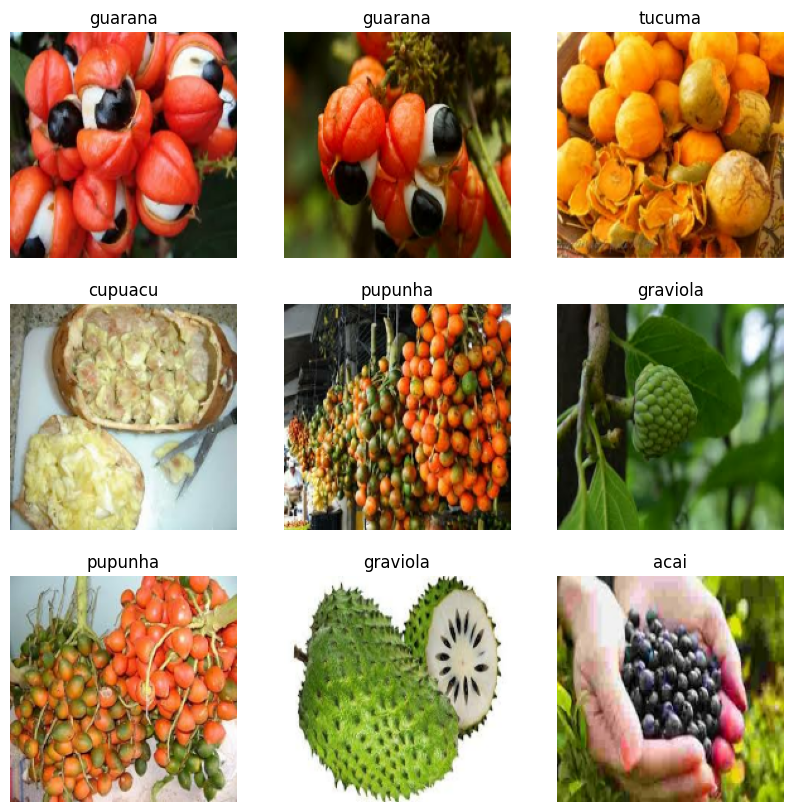

In [8]:
import matplotlib.pyplot as plt

# Display the first batch from training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()


# Model Architectute

## Convolutional Architecture:
1.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
2.   Activation layer [ReLU]
3.   Pooling Layer [max,  F=(2,2), s=2]
4.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
5.   Activation layer [ReLU]
6.   Pooling Layer [max, F=(2,2), s=2]

## Fully Connected Network Architecture:
1. Flatten the input coming from convolutional layer
2. Input Layer/Hidden layer [number of neurons --> 64]
3. Output Layer [number of neurons = num_classes]

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(input_shape, num_classes):
    """
    Generates a convolutional neural network (CNN) model.

    Parameters:
        input_shape (tuple): The shape of the input images (height, width, channels).
        num_classes (int): The number of classes for classification.

    Returns:
        tf.keras.Sequential: A CNN model configured according to the specified input shape and number of classes.
    """
    model = tf.keras.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes)
    ])
    return model

# Example usage:
input_shape = (180, 180, 3)  # Example input shape assuming images are 180x180 pixels with 3 channels (RGB)
num_classes = 10  # Example number of classes
model = generate_model(input_shape, num_classes)
model.summary()  # Print model summary to check the architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64800)             0

# Model Summary and Computational Graph

In [10]:
input_shape = (img_height, img_width, 3)
num_classes = len(train_ds.class_names)

In [11]:
model = generate_model(input_shape, num_classes)

In [12]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64800)            

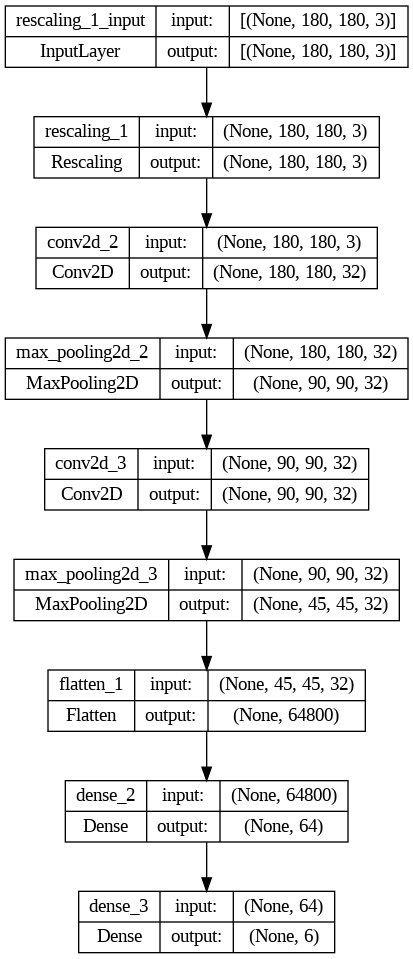

In [13]:
# Plot model graph
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64800)            

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 2.4978 - accuracy: 0.1528 - val_loss: 2.5843 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 3s 926ms/step - loss: 1.8949 - accuracy: 0.3056 - val_loss: 1.5498 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 4s 879ms/step - loss: 1.3947 - accuracy: 0.5694 - val_loss: 1.7243 - val_accuracy: 0.2222
Epoch 4/10
3/3 [==============================] - 3s 906ms/step - loss: 1.1042 - accuracy: 0.5556 - val_loss: 1.4931 - val_accuracy: 0.3889
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.7233 - accuracy: 0.8194 - val_loss: 1.5619 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 3s 894ms/step - loss: 0.4063 - accuracy: 0.8750 - val_loss: 1.4975 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 898ms/step - loss: 0.2540 - accuracy: 0.9583 - val_loss: 1.9452 - val_accuracy: 0.3889
Epoch 8/10
3/3 [==========

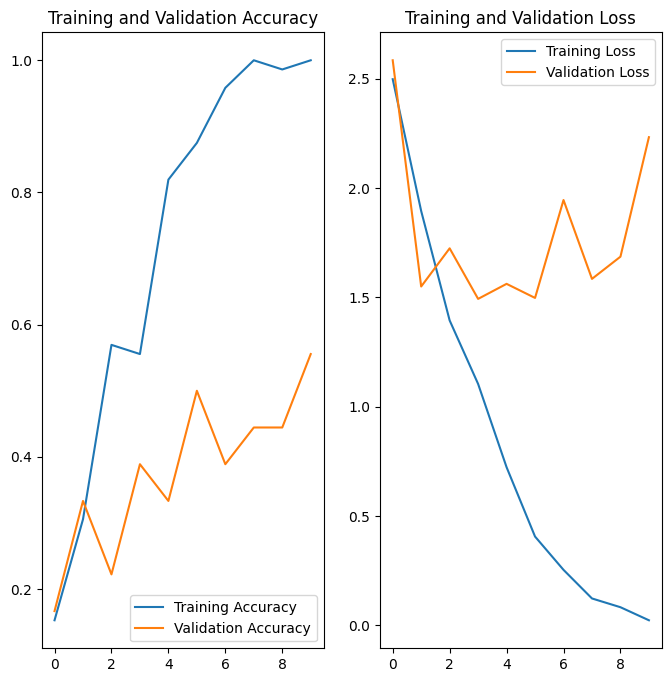

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Question:
Why do you think our model performed the way it performed? <br>
Upon analyzing the performance of our model, several factors could have influenced its performance:

1. **Model Complexity**: The current model architecture might not be sufficiently complex to capture the underlying patterns in the data.

2. **Overfitting**: The model may have overfit to the training data, leading to poor generalization to unseen data.

3. **Underfitting**: Alternatively, the model might be too simple to adequately learn the complexities of the dataset.

4. **Data Quality**: The quality of the training data, including noise, outliers, or lack of representativeness, could impact model performance.

<br>
What we can do to improve the model performance? <br>
To improve the model's performance, we can consider the following strategies:

1. **Experiment with Model Architecture**: Trying out different architectures, such as deeper networks or adding more layers, can help capture more intricate patterns in the data.

2. **Regularization Techniques**: Applying techniques like dropout, L1/L2 regularization, or batch normalization can prevent overfitting and improve generalization.

3. **Data Augmentation**: Increasing the effective size of the training dataset through data augmentation techniques like rotation, flipping, and zooming can help the model generalize better.

4. **Hyperparameter Tuning**: Optimizing hyperparameters such as learning rate, batch size, and optimizer choice can significantly impact model performance.

5. **Transfer Learning**: Leveraging pre-trained models and fine-tuning them on our dataset can be beneficial, especially when dealing with limited data.

6. **Ensemble Learning**: Training multiple models with diverse architectures and combining their predictions often leads to improved performance.

7. **Evaluate Data Quality**: Carefully examining the quality of the training data, removing outliers or noisy samples, and ensuring representativeness can enhance model performance.

By systematically applying these strategies and evaluating the model's performance on validation or test data, we can iteratively refine and improve our model.



# Evaluate the Model

In [19]:
# Directory containing test images
test_dir = '/content/drive/MyDrive/AI and ML Level 6/test'

# Create test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 30 files belonging to 6 classes.
1/1 [==============================] - 1s 639ms/step - loss: 0.7278 - accuracy: 0.6333
Test Loss: 0.7277857065200806
Test Accuracy: 0.6333333253860474
